# Bayesian networks

In [1]:
from IPython.display import Image     #This is used for rendering images in the notebook

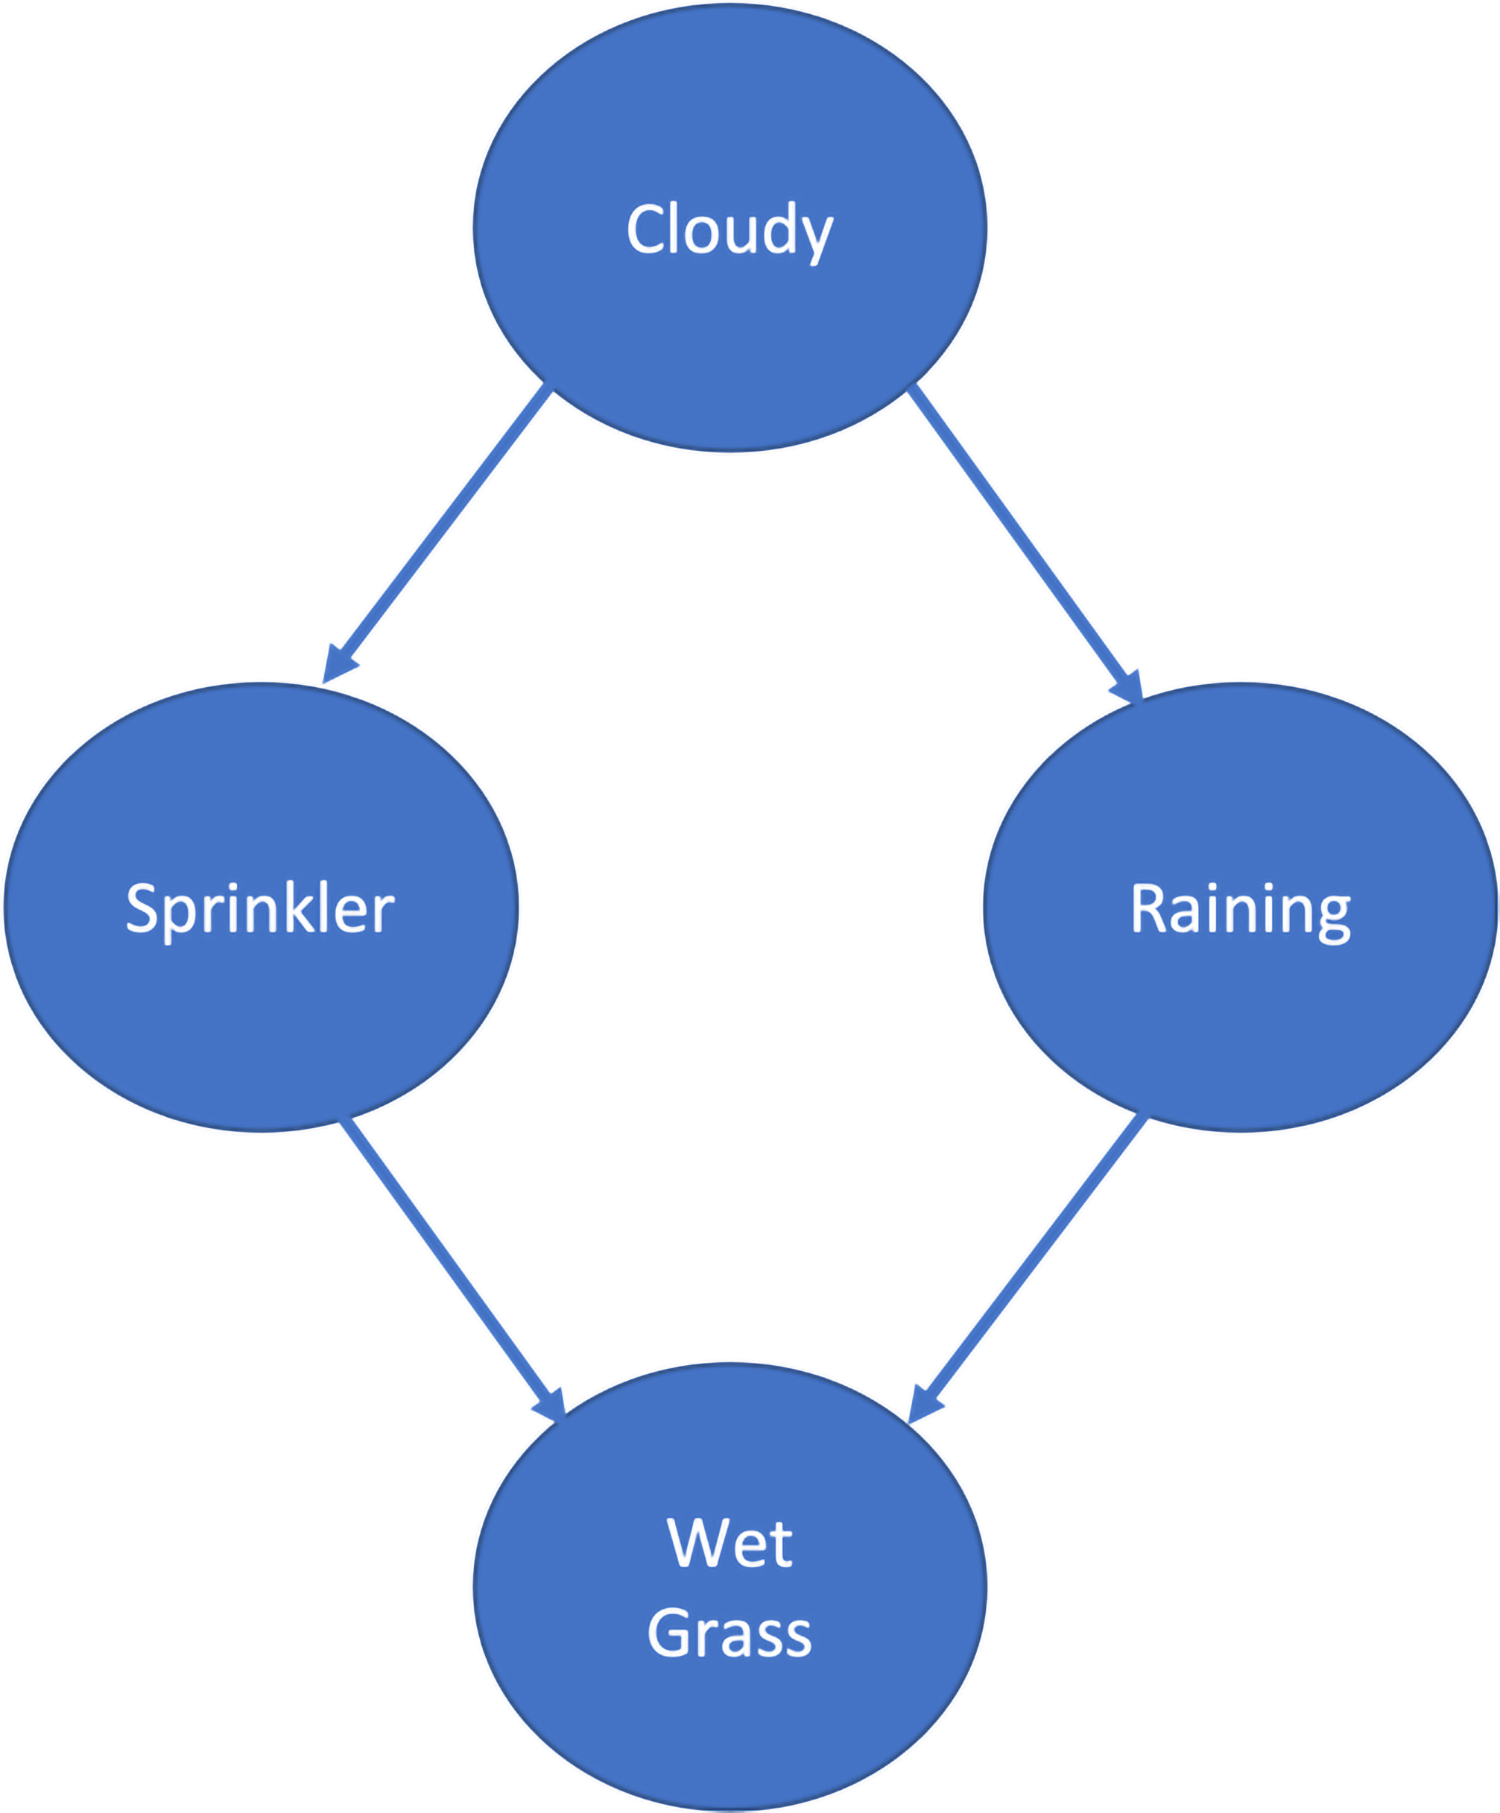

In [2]:
Image('/content/B18331_12_08.png', width=600) #This is used for rendering

In [ ]:
from tensorflow_probability.python import distributions as tfd
import tensorflow_probability.python.experimental.marginalize as marginalize
import functools
import itertools

Root = tfd.JointDistributionCoroutine.Root
def model():
  cloudy = yield Root(tfd.Bernoulli(probs=0.2, dtype=tf.int32))
  sprinkler_prob = [0.5, 0.1]
  sprinkler_prob = tf.gather(sprinkler_prob, cloudy)
  sprinkler = yield tfd.Bernoulli(probs=sprinkler_prob, dtype=tf.int32)
  raining_prob = [0.1, 0.8]
  raining_prob = tf.gather(raining_prob, cloudy)
  raining = yield tfd.Bernoulli(probs=raining_prob, dtype=tf.int32)

  grass_wet_prob = [[0.0, 0.8],
                    [0.9, 0.99]]
  grass_wet_prob = tf.gather_nd(grass_wet_prob, _stack(sprinkler, raining))
  grass_wet = yield tfd.Bernoulli(probs=grass_wet_prob, dtype=tf.int32)



def _conform(ts):
  """Broadcast all arguments to a common shape."""

  shape = functools.reduce(
      tf.broadcast_static_shape, [a.shape for a in ts])
  return [tf.broadcast_to(a, shape) for a in ts]


def _stack(*ts):
  return tf.stack(_conform(ts), axis=-1)

In [ ]:
d = marginalize.MarginalizableJointDistributionCoroutine(model)
    # We want to know the probability that it was raining
    # and we want to marginalize over the state of the sprinkler.
observations = ['marginalize',  # We don't know the cloudy state
                'tabulate', # We want to know the probability it rained.
                'marginalize',  # We don't know the sprinkler state.
                1]              # We observed a wet lawn.
p = tf.exp(d.marginalized_log_prob(observations))
p = p / tf.reduce_sum(p)

In [ ]:
p.numpy()

array([0.27761015, 0.72238994], dtype=float32)

In [ ]:
observations = ['marginalize',  
                'marginalize', 
                'tabulate',  
                1]              
p = tf.exp(d.marginalized_log_prob(observations))
p = p / tf.reduce_sum(p)

In [ ]:
observations = ['marginalize',  
                0, 
                0 ,  
                'tabulate']              
p = tf.exp(d.marginalized_log_prob(observations))
p = p / tf.reduce_sum(p)

In [ ]:
p

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 0.], dtype=float32)>